### 1. PREPARING DATA & DATA PREPROCESSING

In [269]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [235]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [237]:
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

In [240]:
# Label Encoding Target
y = y[['diagnosis']].replace(['M', 'B'], ['1', '0']) 
y = y.astype(int)

In [242]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2. EDA

Text(0.5, 1.0, 'Malignant/Benign - Value Ratios')

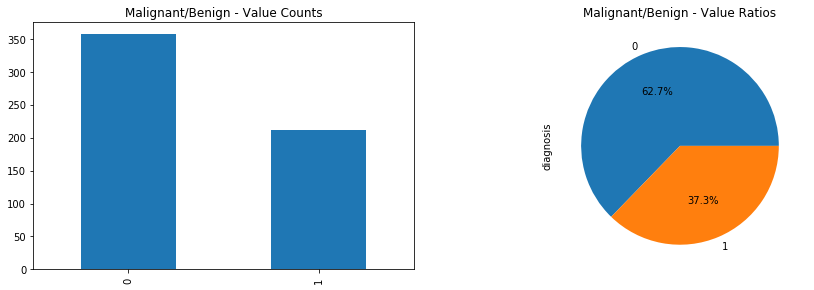

In [243]:
# Target _ value counts / ratios
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ax = y["diagnosis"].value_counts().plot(kind = "bar")
ax.set_title('Malignant/Benign - Value Counts')
plt.subplot(2, 2, 2)
ax1 = y["diagnosis"].value_counts().plot(kind = "pie", autopct = '%1.1f%%') 
ax1.set_title('Malignant/Benign - Value Ratios')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

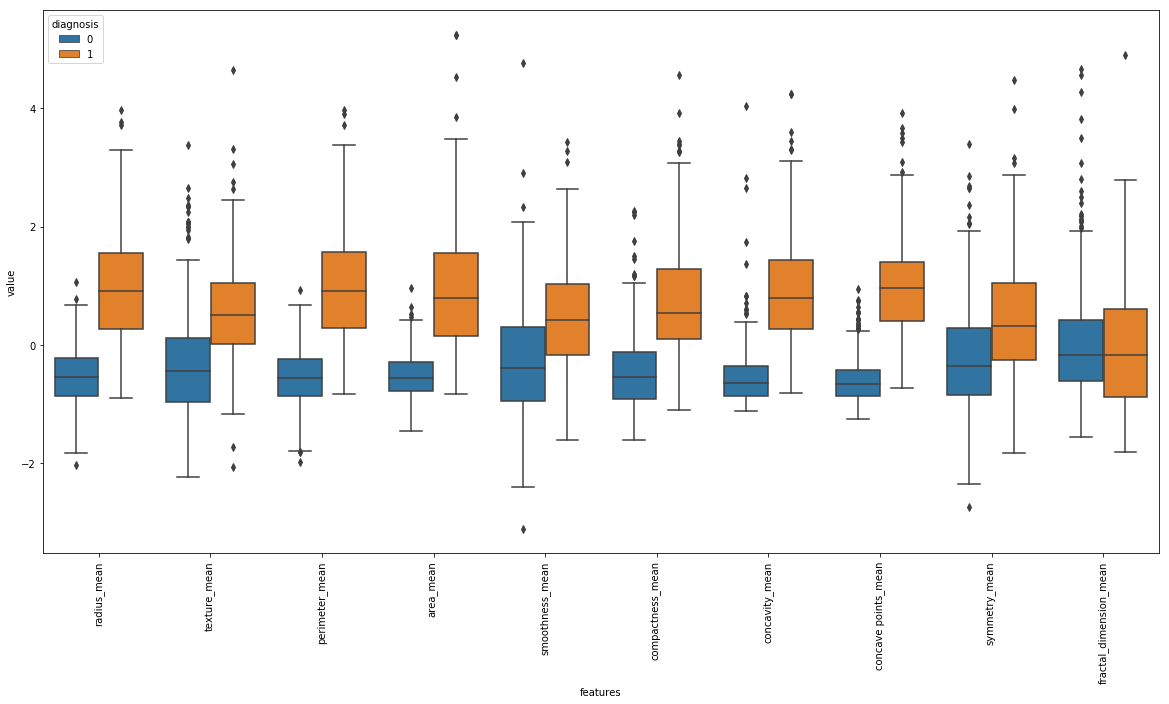

In [244]:
# Boxplots of X[0:10] (Standardization)
Stand_X = (X - X.mean()) / (X.std())             
Stand_X_with_y = pd.concat([y, Stand_X.iloc[:, 0:10]], axis=1)
Stand_X_with_y  = pd.melt(Stand_X_with_y, id_vars = "diagnosis",
                    var_name = "features",
                    value_name = 'value')

plt.figure(figsize=(20,10))
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = Stand_X_with_y)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

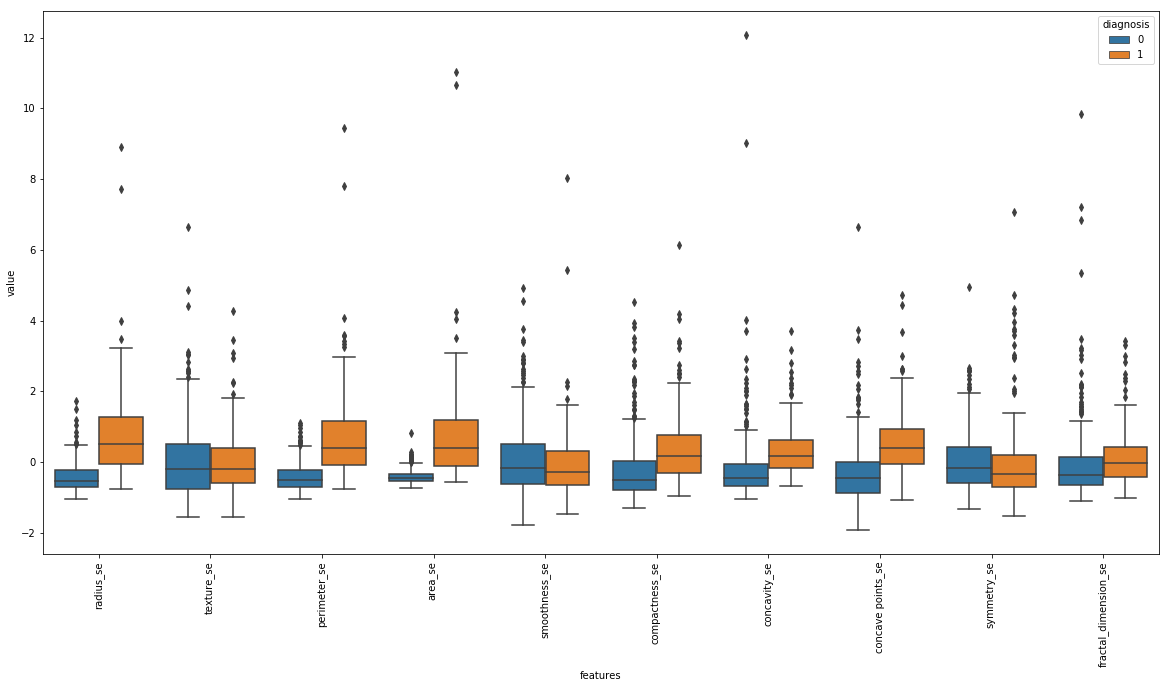

In [245]:
# Boxplots of X[11:20] (Standardization)
Stand_X_with_y = pd.concat([y, Stand_X.iloc[:, 10:20]], axis=1)
Stand_X_with_y  = pd.melt(Stand_X ,id_vars = "diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = Stand_X_with_y)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

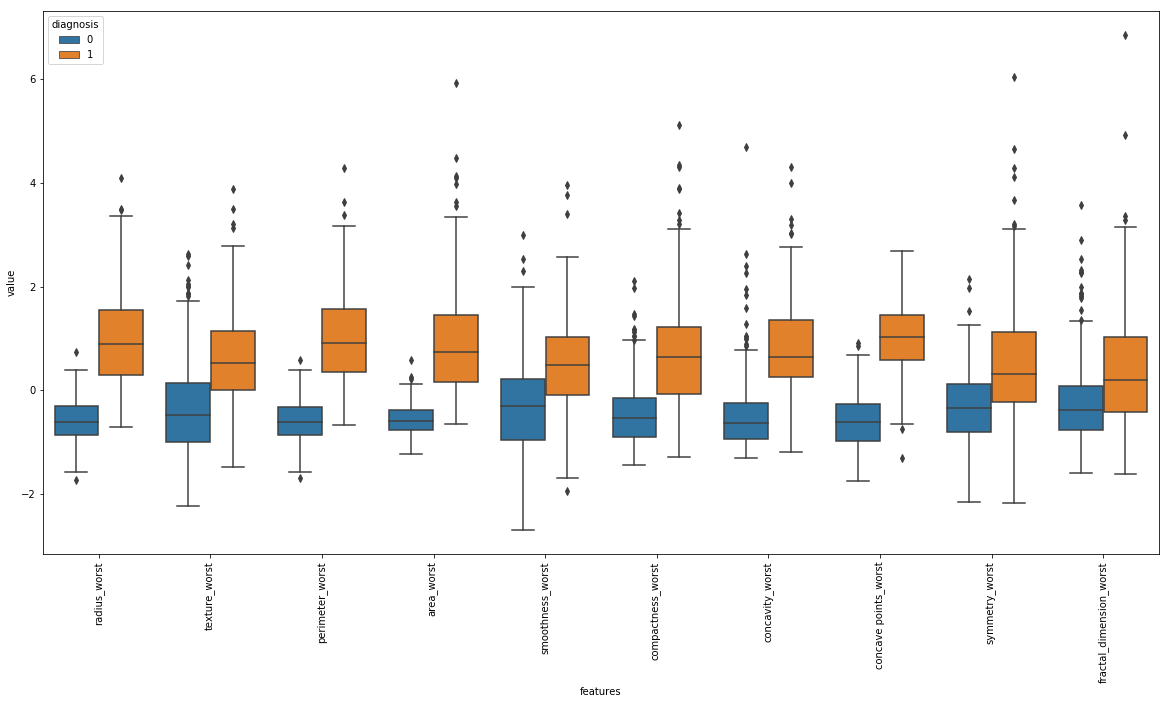

In [246]:
# Boxplots of X[21:30] (Standardization)
Stand_X_with_y = pd.concat([y, Stand_X.iloc[:,20:30]],axis = 1)
Stand_X_with_y  = pd.melt(Stand_X ,id_vars = "diagnosis",
                    var_name = "features",
                    value_name = 'value')

plt.figure(figsize=(20,10))
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = Stand_X_with_y)
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Corrleation Heatmap')

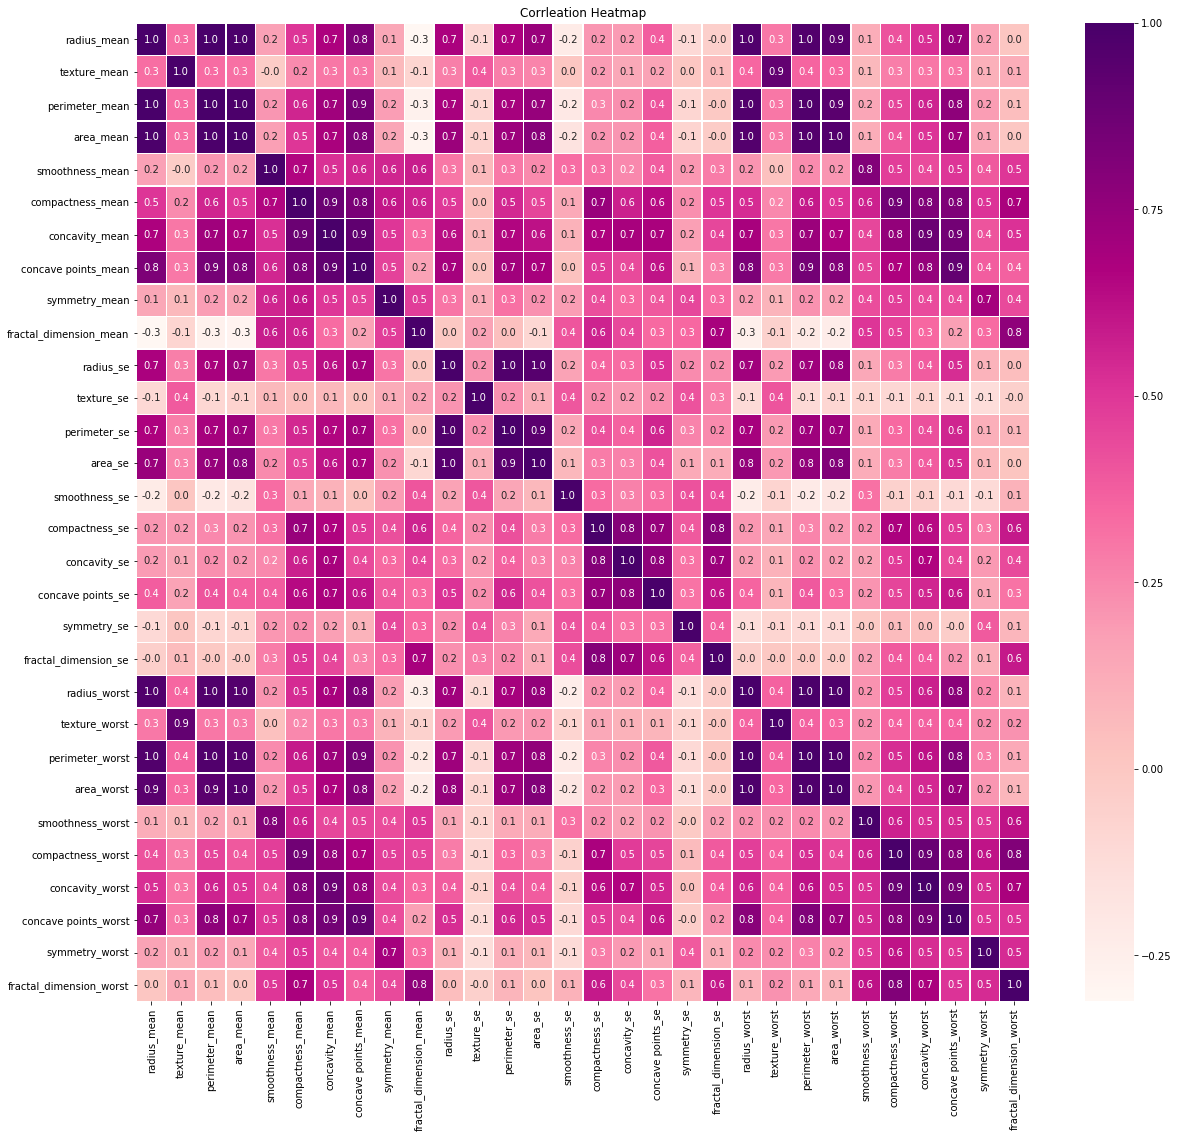

In [247]:
f,ax = plt.subplots(figsize = (20, 18))
sns.heatmap(X.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'RdPu')
plt.title('Corrleation Heatmap')

### 3. FEATURE SELECTION 
BY USING VIF

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,63306.172036,radius_mean
1,251.047108,texture_mean
2,58123.586079,perimeter_mean
3,1287.262339,area_mean
4,393.398166,smoothness_mean
5,200.980354,compactness_mean
6,157.855046,concavity_mean
7,154.241268,concave points_mean
8,184.426558,symmetry_mean
9,629.679874,fractal_dimension_mean


In [176]:
# Check Correlation and VIF
mean_factors = X.iloc[ : , 0:10] 
se_factors = X.iloc[ : , 10:20]
worst_factors = X.iloc[ : , 20:30]

In [177]:
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(mean_factors.values, i) for i in range(mean_factors.shape[1])]
vif1["features"] = mean_factors.columns
vif1

,VIF Factor,features
0,27447.771770,radius_mean
1,23.933372,texture_mean
2,29501.347528,perimeter_mean
3,157.954975,area_mean
4,136.564939,smoothness_mean
5,81.953895,compactness_mean
6,26.049705,concavity_mean
7,52.400513,concave points_mean
8,74.980219,symmetry_mean
9,193.849464,fractal_dimension_mean


In [178]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(se_factors.values, i) for i in range(se_factors.shape[1])]
vif2["features"] = se_factors.columns
vif2

,VIF Factor,features
0,86.702093,radius_se
1,7.706940,texture_se
2,76.861387,perimeter_se
3,26.625721,area_se
4,9.261231,smoothness_se
5,15.352177,compactness_se
6,8.157192,concavity_se
7,16.555154,concave points_se
8,9.804762,symmetry_se
9,11.105938,fractal_dimension_se


In [179]:
vif3 = pd.DataFrame()
vif3["VIF Factor"] = [variance_inflation_factor(worst_factors.values, i) for i in range(worst_factors.shape[1])]
vif3["features"] = worst_factors.columns
vif3

,VIF Factor,features
0,1576.484468,radius_worst
1,22.648946,texture_worst
2,1434.831269,perimeter_worst
3,57.122238,area_worst
4,67.306324,smoothness_worst
5,34.075212,compactness_worst
6,19.049757,concavity_worst
7,36.332374,concave points_worst
8,38.812700,symmetry_worst
9,86.164311,fractal_dimension_worst


In [180]:
new_mean_factors =  mean_factors[['texture_mean','concavity_mean',]]
new_se_factors =  se_factors[['texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se']]
new_worst_factors =  worst_factors[[ 'texture_worst','area_worst','concavity_worst',]]

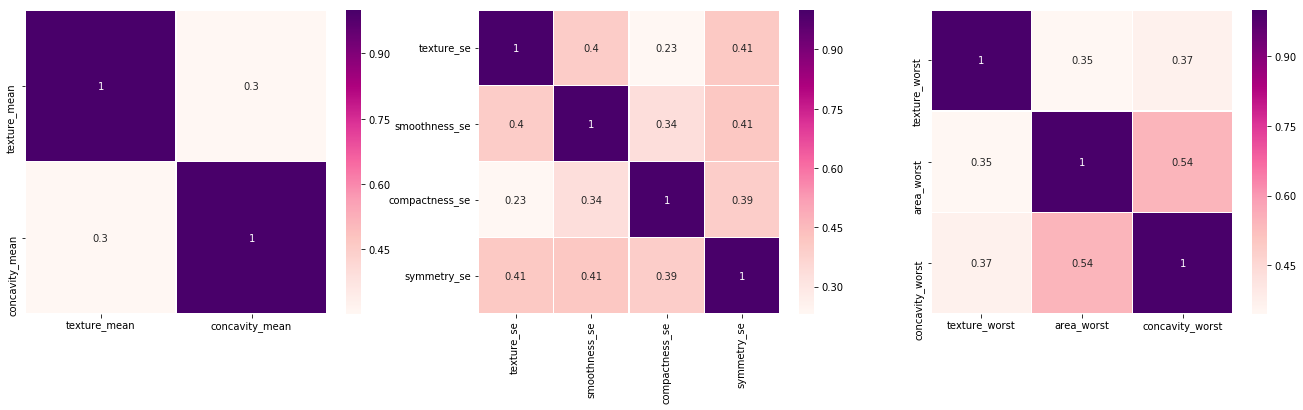

In [181]:
# Correlation heatmap by Groups

plt.figure(figsize=(23, 19))
plt.subplot(3,3,1)
sns.heatmap(new_mean_factors.corr(), annot=True, linewidths=.5, cmap='RdPu')
plt.subplot(3,3,2)
sns.heatmap(new_se_factors.corr(), annot=True, linewidths=.5, cmap='RdPu')
plt.subplot(3,3,3)
sns.heatmap(new_worst_factors.corr(), annot=True, linewidths=.5, cmap='RdPu')

In [182]:
# Choose variances(1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
   important_factors.values, i) for i in range(important_factors.shape[1])]
vif["features"] = important_factors.columns
vif

,VIF Factor,features
0,153.825748,texture_mean
1,22.231332,concavity_mean
2,181.596358,texture_worst
3,9.188280,area_worst
4,24.254430,concavity_worst
5,13.996166,texture_se
6,8.611346,smoothness_se
7,8.904325,compactness_se
8,9.514845,symmetry_se


In [183]:
important_factors = X[['texture_mean','concavity_mean',
                       'texture_worst','area_worst','concavity_worst',
                       'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se']]

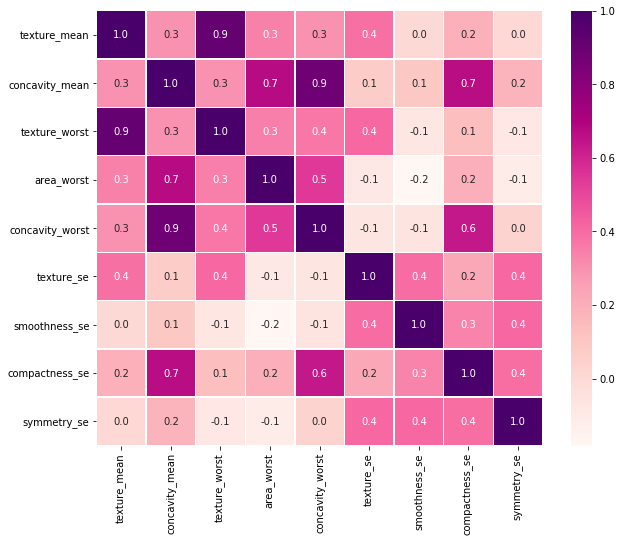

In [184]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(important_factors.corr(), annot = True, linewidths = .5, fmt =  '.1f', ax = ax, cmap = 'RdPu')

In [185]:
# Choose variances (finally)
important_factors2 = X[['texture_mean',
                        'area_worst','concavity_worst',
                        'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se']]

Text(0.5, 1.0, 'Correlation Heatmap of Selected Features')

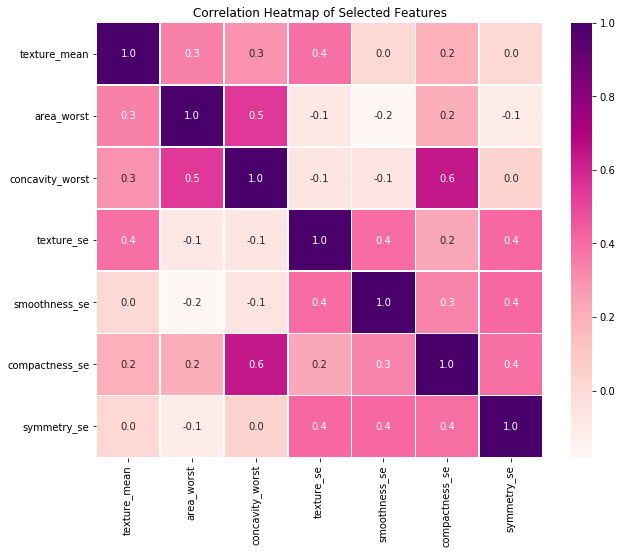

In [186]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(important_factors2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='RdPu')
plt.title('Correlation Heatmap of Selected Features')

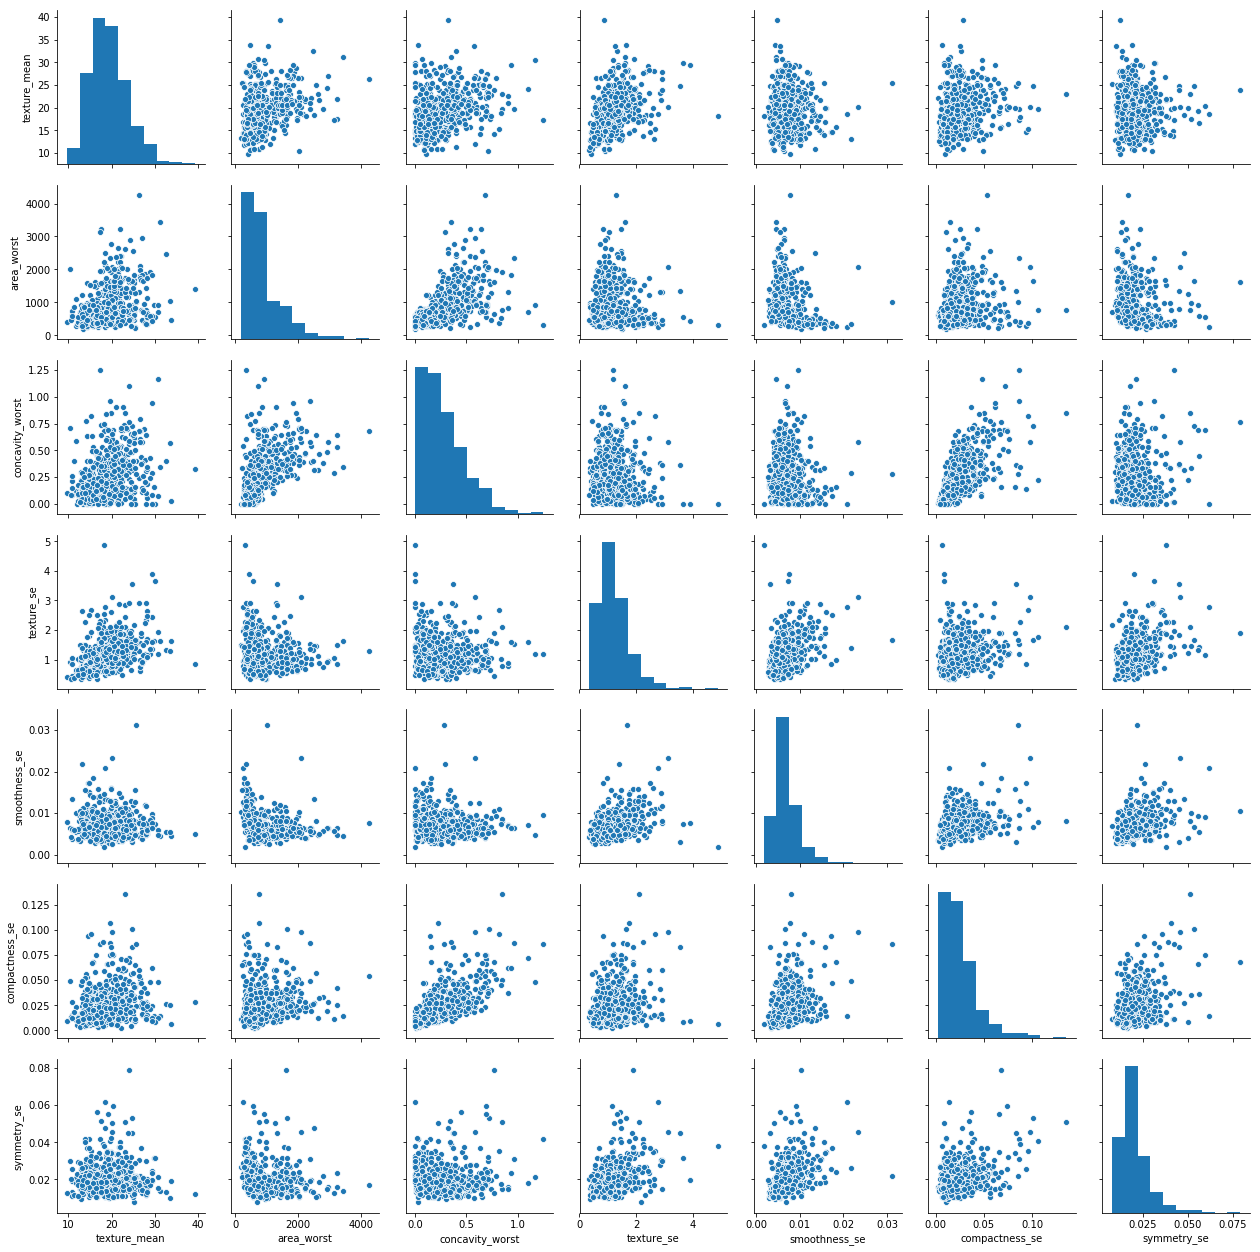

In [207]:
from statsmodels.datasets.longley import load_pandas
sns.pairplot(important_factors2)
plt.show()

### 4. MODELING

In [277]:
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as mt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [189]:
x = important_factors2
x.head()

,texture_mean,area_worst,concavity_worst,texture_se,smoothness_se,compactness_se,symmetry_se
0,10.38,2019.0,0.7119,0.9053,0.006399,0.04904,0.03003
1,17.77,1956.0,0.2416,0.7339,0.005225,0.01308,0.01389
2,21.25,1709.0,0.4504,0.7869,0.006150,0.04006,0.02250
3,20.38,567.7,0.6869,1.1560,0.009110,0.07458,0.05963
4,14.34,1575.0,0.4000,0.7813,0.011490,0.02461,0.01756


In [190]:
#SPLITING TRAIN/TEST DATA

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 7)
(171, 7)
(398, 1)
(171, 1)


### 4-1. LOGISTIC REGRESSION

정확도: 0.9239766081871345 

오차행렬
 [[101   7]
 [  6  57]] 

정밀도: 0.890625 

재현율: 0.905 

F1스코어: 0.8976377952755906 



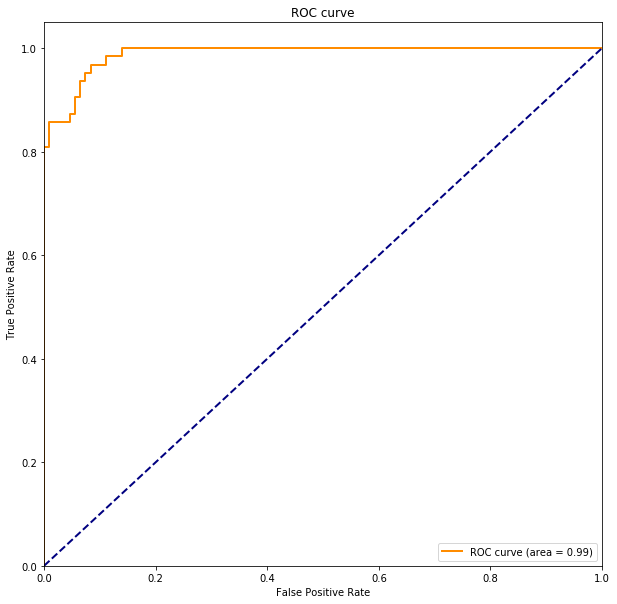

In [270]:
logr=lm.LogisticRegression(solver='liblinear')
reg=logr.fit(x_train, y_train)
y_pred = reg.predict(x_test)         

print('정확도:', mt.accuracy_score(y_test, y_pred),'\n')
print('오차행렬\n', mt.confusion_matrix(y_test, y_pred), '\n')
print('정밀도:',mt.precision_score(np.array(y_test.diagnosis).astype(int), y_pred.astype(int)), '\n')
print('재현율:',round(mt.recall_score(y_test, y_pred),3),'\n')
print('F1스코어:', mt.f1_score(y_test, y_pred), '\n')

pred_test = reg.predict_proba(x_test) 
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) 
roc_auc = auc(fpr, tpr) 
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

### 4-2. XGBOOST

In [ ]:
negative = y_train.value_counts()[0]
positive = y_train.value_counts()[1]
spw = negative/positive

xgb_clf = XGBClassifier(n_estimators=250,random_state=150,
                        scale_pos_weight=spw)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

print('성능평가:',xgb_clf.score(X_test, y_test))
print('정확도:', mt.accuracy_score(y_test, xgb_pred),'\n')
print('오차행렬\n', mt.confusion_matrix(y_test, xgb_pred), '\n')

pred_test = xgb_clf.predict_proba(x_test) 
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) 
roc_auc = auc(fpr, tpr) 
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

### 4-4. KNN

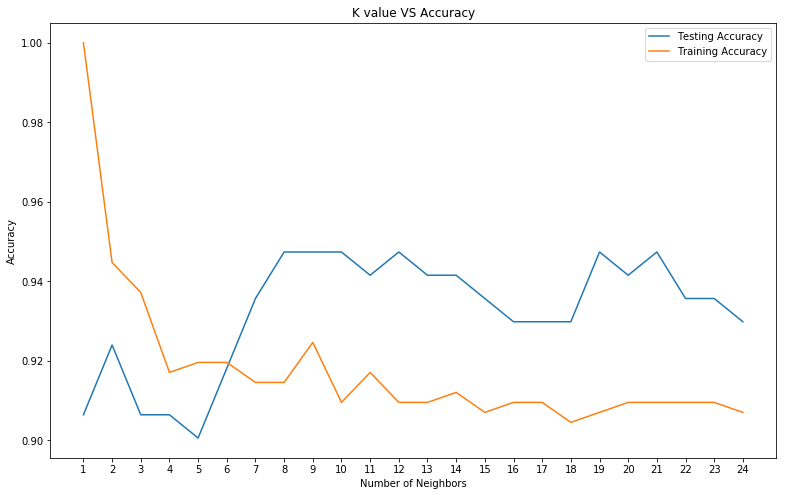

Best accuracy is 0.9473684210526315 with K = 8


In [275]:
#finding the optimal k

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1 + test_accuracy.index(np.max(test_accuracy))))

성능평가: 0.9473684210526315
정확도: 0.9473684210526315 

오차행렬
 [[106   2]
 [  7  56]] 

정밀도: 0.9655172413793104 

재현율: 0.889 

F1스코어: 0.9256198347107438 



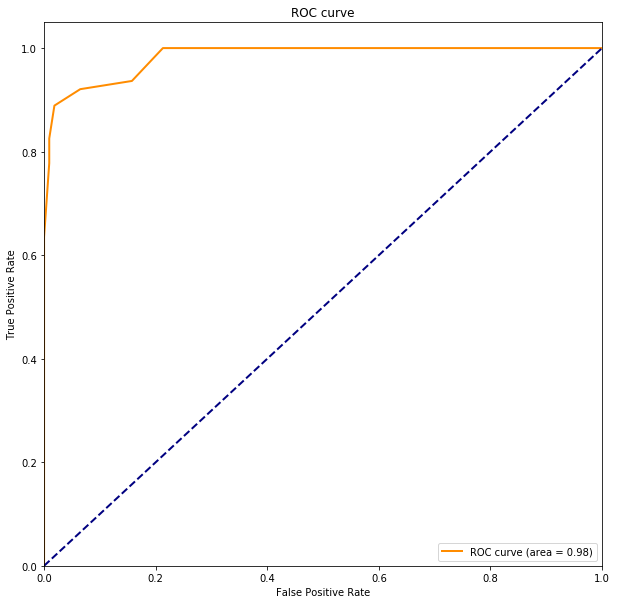

In [273]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('성능평가:',knn.score(x_test, y_test))
print('정확도:', mt.accuracy_score(y_test, y_pred),'\n')
print('오차행렬\n', mt.confusion_matrix(y_test, y_pred), '\n')
print('정밀도:',mt.precision_score(y_test, y_pred), '\n')
print('재현율:',round(mt.recall_score(y_test, y_pred),3),'\n')
print('F1스코어:', mt.f1_score(y_test, y_pred), '\n')

pred_test = knn.predict_proba(x_test) 
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) 
roc_auc = auc(fpr, tpr) 
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

### 4-5. DECISION TREE

성능평가: 0.9122807017543859
정확도: 0.9122807017543859 

오차행렬
 [[95 13]
 [ 2 61]] 

정밀도: 0.8243243243243243 

재현율: 0.968 

F1스코어: 0.8905109489051095 



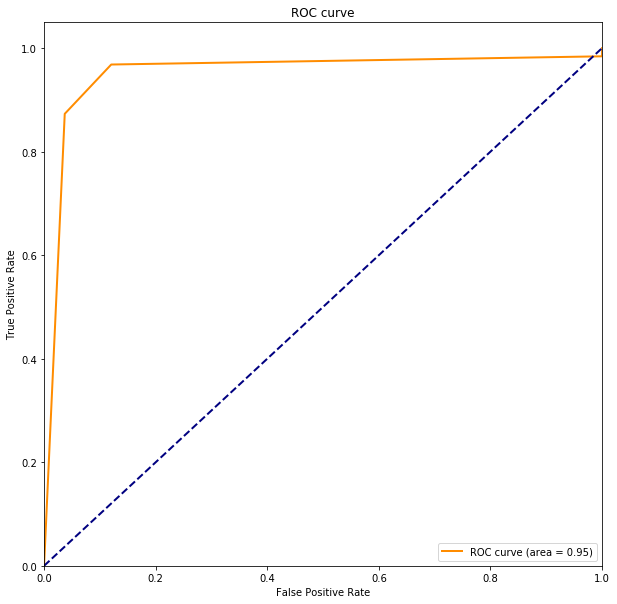

In [264]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 0)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print('성능평가:',decision_tree.score(x_test, y_test))
print('정확도:', mt.accuracy_score(y_test, y_pred),'\n')
print('오차행렬\n', mt.confusion_matrix(y_test, y_pred), '\n')
print('정밀도:',mt.precision_score(y_test, y_pred), '\n')
print('재현율:',round(mt.recall_score(y_test, y_pred),3),'\n')
print('F1스코어:', mt.f1_score(y_test, y_pred), '\n')

pred_test = decision_tree.predict_proba(x_test) 
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) 
roc_auc = auc(fpr, tpr) 
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color ='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.title("ROC curve")
plt.show()

### 4-6. RANDOM FOREST

성능평가: 0.935672514619883
정확도: 0.935672514619883 

오차행렬
 [[99  9]
 [ 2 61]] 

정밀도: 0.8714285714285714 

재현율: 0.968 

F1스코어: 0.9172932330827068 



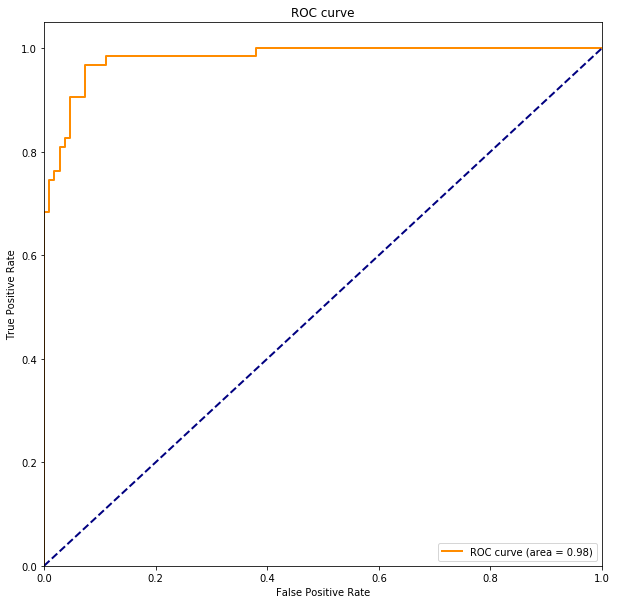

In [274]:
random_forest = RandomForestClassifier(criterion = 'gini', max_depth = 4, random_state = 0)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

print('성능평가:',random_forest.score(x_test, y_test))
print('정확도:', mt.accuracy_score(y_test, y_pred),'\n')
print('오차행렬\n', mt.confusion_matrix(y_test, y_pred), '\n')
print('정밀도:',mt.precision_score(y_test, y_pred), '\n')
print('재현율:',round(mt.recall_score(y_test, y_pred),3),'\n')
print('F1스코어:', mt.f1_score(y_test, y_pred), '\n')

pred_test = random_forest.predict_proba(x_test) 
fpr, tpr, _ = roc_curve(y_true = y_test, y_score = pred_test[:,1]) 
roc_auc = auc(fpr, tpr) 
plt.figure(figsize = (10, 10))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.title("ROC curve")
plt.show()